### Step 1: import libraries 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### Step 2: Load dataset and convert it into dataframe

In [16]:
# Load dataset into a single object
iris = load_iris(as_frame=True)  

# The dataset is now in iris.frame
df = iris.frame
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Step 3: Perform Basic EDA + Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(1)

### Step 4: Analysis & Visualization

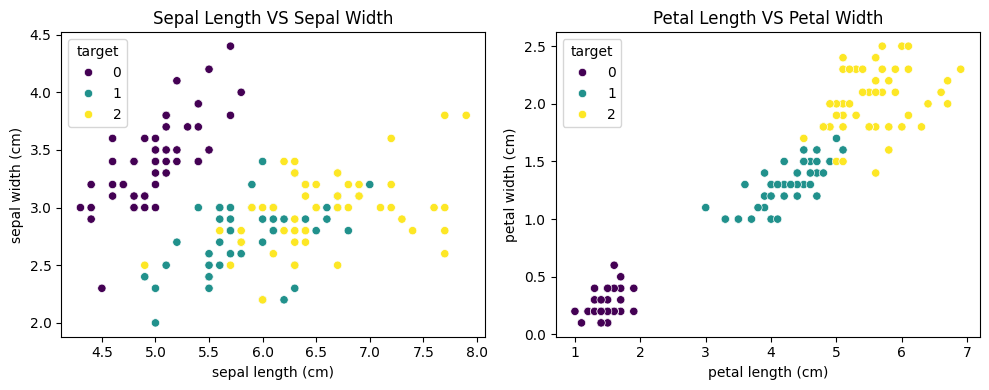

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (10,4))

#plot sepal length VS sepal width
sns.scatterplot(ax=axes[0], x = df["sepal length (cm)"], y = df["sepal width (cm)"], hue = df["target"], palette = "viridis")
axes[0].set_title("Sepal Length VS Sepal Width")

#plot petal length Vs petal width
sns.scatterplot(ax=axes[1], x = df["petal length (cm)"], y = df["petal width (cm)"], hue = df["target"], palette="viridis")
axes[1].set_title("Petal Length VS Petal Width")

# Adjust Layout and show figure
plt.tight_layout()
plt.show()

### Step 5: Spliting the data

In [22]:
X = df.drop("target", axis=1)
Y = df["target"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


### Step 6: Train the Logistic Regression Model

In [24]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

### Step 7: Evaluate the model

In [25]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
accuracy

1.0

### Step 8: Check on new Datapoint

In [26]:
# extract the features from dataframe 
features_name = x_train.columns

# create dataframe for new input
new_input = pd.DataFrame([[6.5, 3.0, 5.2, 2.0]], columns = features_name)

# predict on new input
model.predict(new_input)

array([2])